In [1]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
diabetes = load_diabetes(as_frame=True)

In [3]:
X, y = diabetes['data'], diabetes['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [25]:
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 20

def add_title(ax, title, subtitle):
    ax.text(-0.07, 1.1, title, fontsize=26, weight='bold', transform=ax.transAxes)
    ax.text(-0.07, 1.04, subtitle, fontsize=20, transform=ax.transAxes)

def plot_importances(rf, features_names, *, title, subtitle, ax=None, color_name=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    feature_importances = rf.feature_importances_
    forest_importances = (pd.Series(feature_importances, index=features_names)
                          .sort_values(ascending=False))
    
    forest_importances.plot.bar(ax=ax)
    add_title(ax, title, subtitle)
    ax.set_xticklabels(forest_importances.index, rotation=30)
    ax.set_xlabel("Feature name")
    
    if color_name is not None:
        color_x = list(forest_importances.index).index(color_name) - 0.45
        ax.add_patch(Rectangle((color_x, 0), 0.9, 1, alpha=0.2, facecolor='yellow'))
    return ax

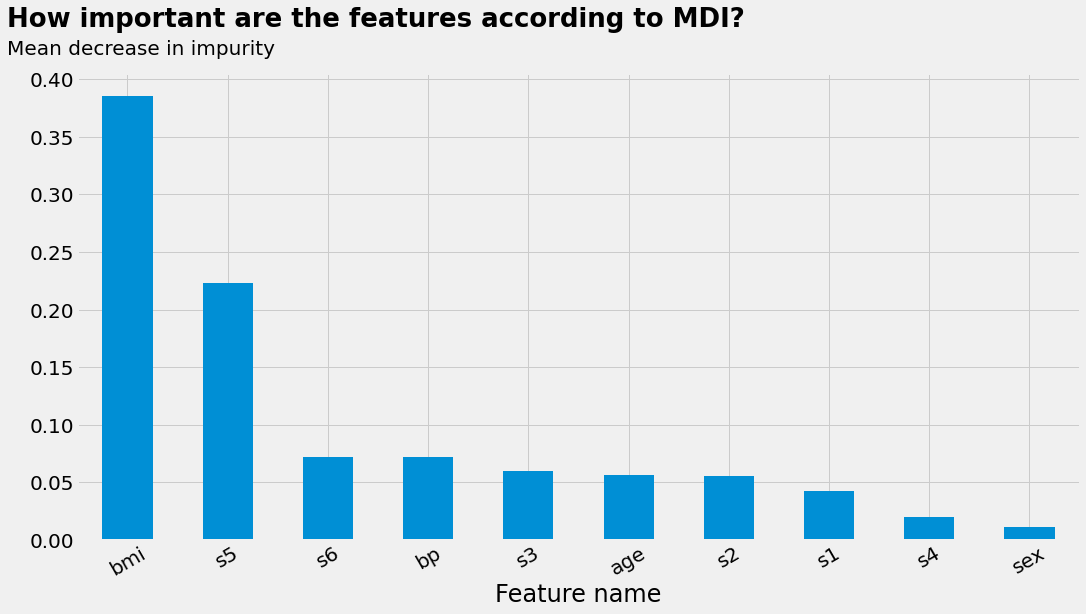

In [6]:
rf_base = RandomForestRegressor(random_state=0).fit(X_train, y_train)

fig, ax = plt.subplots()
ax = plot_importances(rf_base, X.columns,
                     title="How important are the features according to MDI?",
                     subtitle="Mean decrease in impurity", ax=ax)
fig.savefig("static/images/impurity.png", bbox_inches='tight')

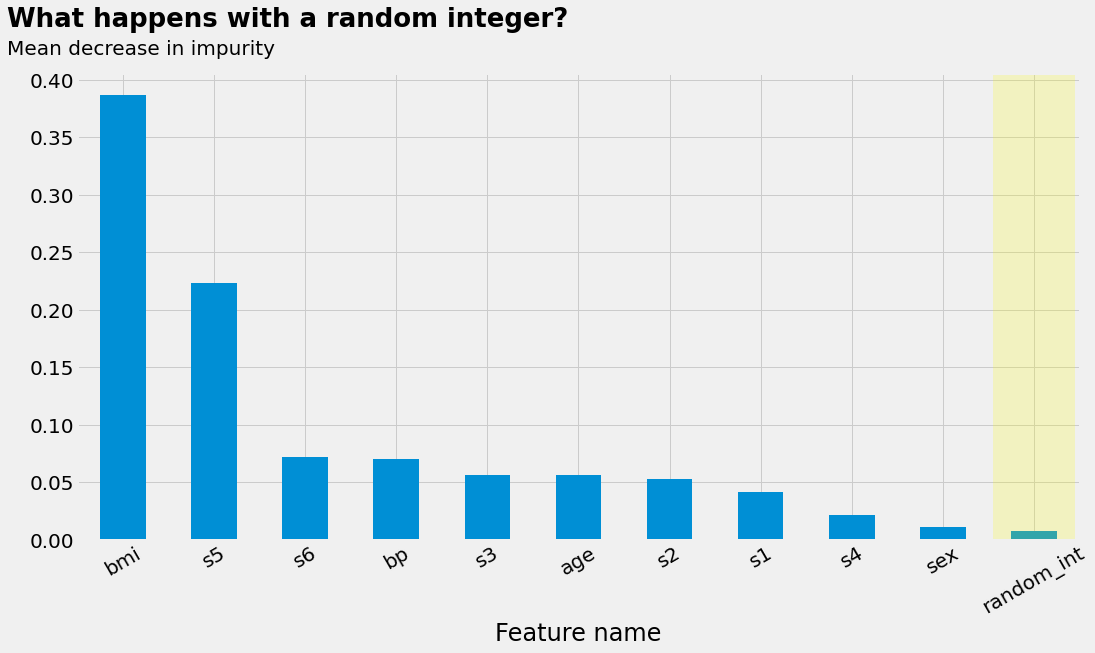

In [7]:
from numpy.random import default_rng
rng = default_rng(100)

X_random_int = X_train.assign(
    random_int=rng.integers(0, high=2, size=X_train.shape[0]),
)
rf_random_int = (RandomForestRegressor(random_state=0)
                 .fit(X_random_int, y_train))

fig, ax = plt.subplots()
ax = plot_importances(rf_random_int, X_random_int.columns,
                     title="What happens with a random integer?",
                     subtitle="Mean decrease in impurity",
                     color_name='random_int', ax=ax)
fig.savefig("static/images/impurity_random_int.png", bbox_inches='tight')

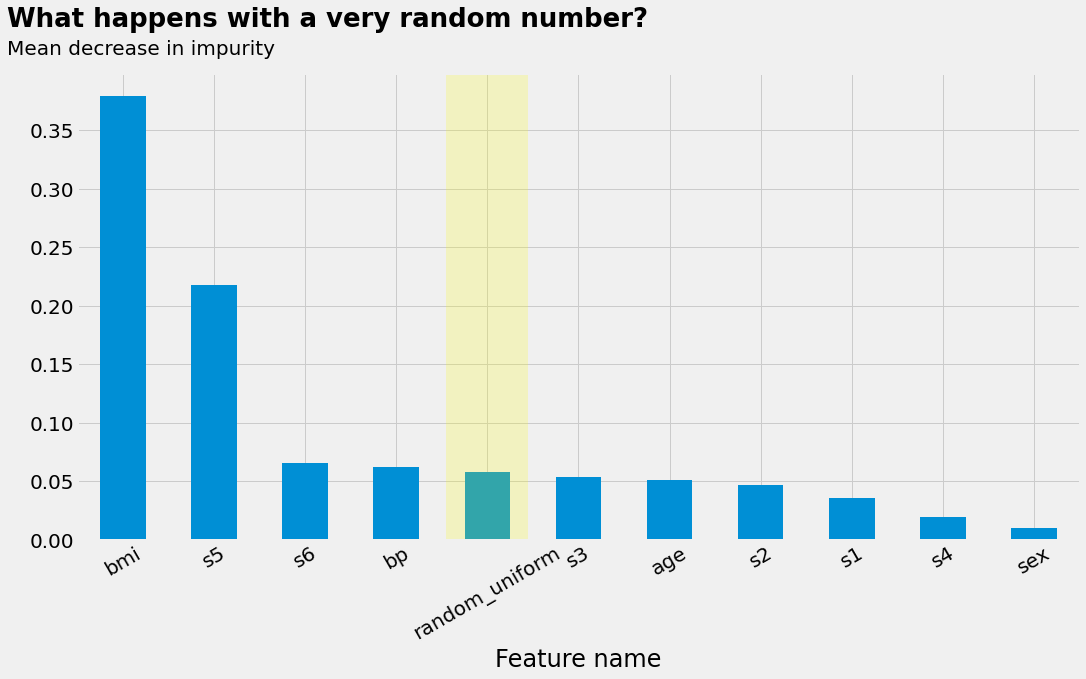

In [30]:
X_uniform_random = X_train.assign(
    random_uniform=rng.random(size=X_train.shape[0]),
)
rf_uniform_random = RandomForestRegressor(random_state=0).fit(X_uniform_random, y_train)

fig, ax = plt.subplots()
ax = plot_importances(rf_uniform_random, X_uniform_random.columns,
                     title="What happens with a very random number?",
                     subtitle="Mean decrease in impurity",
                     color_name='random_uniform', ax=ax)
fig.savefig("static/images/impurity_very_random.png", bbox_inches='tight')

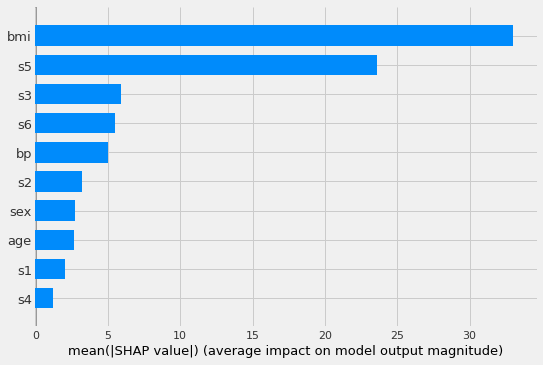

In [9]:
import shap
shap_values = shap.TreeExplainer(rf_base).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

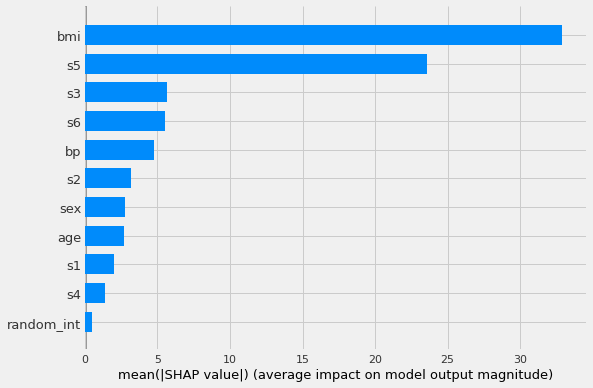

In [10]:
import shap
shap_values = shap.TreeExplainer(rf_random_int).shap_values(X_random_int)
shap.summary_plot(shap_values, X_random_int, plot_type="bar")

In [ ]:
import shap
shap_values = shap.TreeExplainer(rf_uniform_random).shap_values(X_uniform_random)
shap.summary_plot(shap_values, X_uniform_random, plot_type="bar", show=False)
ax = plt.gca()
add_title(ax, "Does SHAP Help?", "")
fig.savefig("static/images/shap_uniform_random.png", bbox_inches='tight')